In this notebook, we will use the pytorch dataloader to load a custom dataset (MNIST Digits dataset in this case) from file.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
import imageio as imo
import os

In [ ]:
# Downloading dataset and storing in disk
!wget -O data.zip https://www.dropbox.com/sh/zbtnl65mtfvhpg7/AAD5SjeBToKkaYZ5A7gxw4yGa?dl=0

--2024-01-06 10:54:42--  https://www.dropbox.com/sh/zbtnl65mtfvhpg7/AAD5SjeBToKkaYZ5A7gxw4yGa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/zbtnl65mtfvhpg7/AAD5SjeBToKkaYZ5A7gxw4yGa [following]
--2024-01-06 10:54:43--  https://www.dropbox.com/sh/raw/zbtnl65mtfvhpg7/AAD5SjeBToKkaYZ5A7gxw4yGa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6593a25234758c985591fe060.dl-eu.dropboxusercontent.com/zip_download_get/BuM0MPaeBe-gAb68BJ5taSj6U048f1XFjn_cGjgIcPCNzMmW9CkzOJoRuI7xtELFWkSq2gh5GB47JHHWjAjmjmWTM4W9dATRNMe1KMPyV1ASAQ# [following]
--2024-01-06 10:54:43--  https://ucb6593a25234758c985591fe060.dl-eu.dropboxusercontent.com/zip_download_get/BuM0MPaeBe-gAb68BJ5taSj6U048f1XFjn_cGjgIcPCNzMmW9CkzOJoRuI7xtELFWkSq2gh5GB47JHHWjAjmjm

In [ ]:
# Extracting
!unzip data.zip
!gunzip mnist_train.tar.gz
!tar -xf mnist_train.tar

!gunzip mnist_test.tar.gz
!tar -xf mnist_test.tar

Archive:  data.zip
mapname:  conversion of  failed
 extracting: mnist_test.csv          
 extracting: mnist_train.csv         
 extracting: mnist_test.tar.gz       
 extracting: mnist_train.tar.gz      


In [ ]:
!ls test/

In [ ]:
!ls

data.zip	mnist_test.tar	 mnist_train.tar  test
mnist_test.csv	mnist_train.csv  sample_data	  train


## Datasets & Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

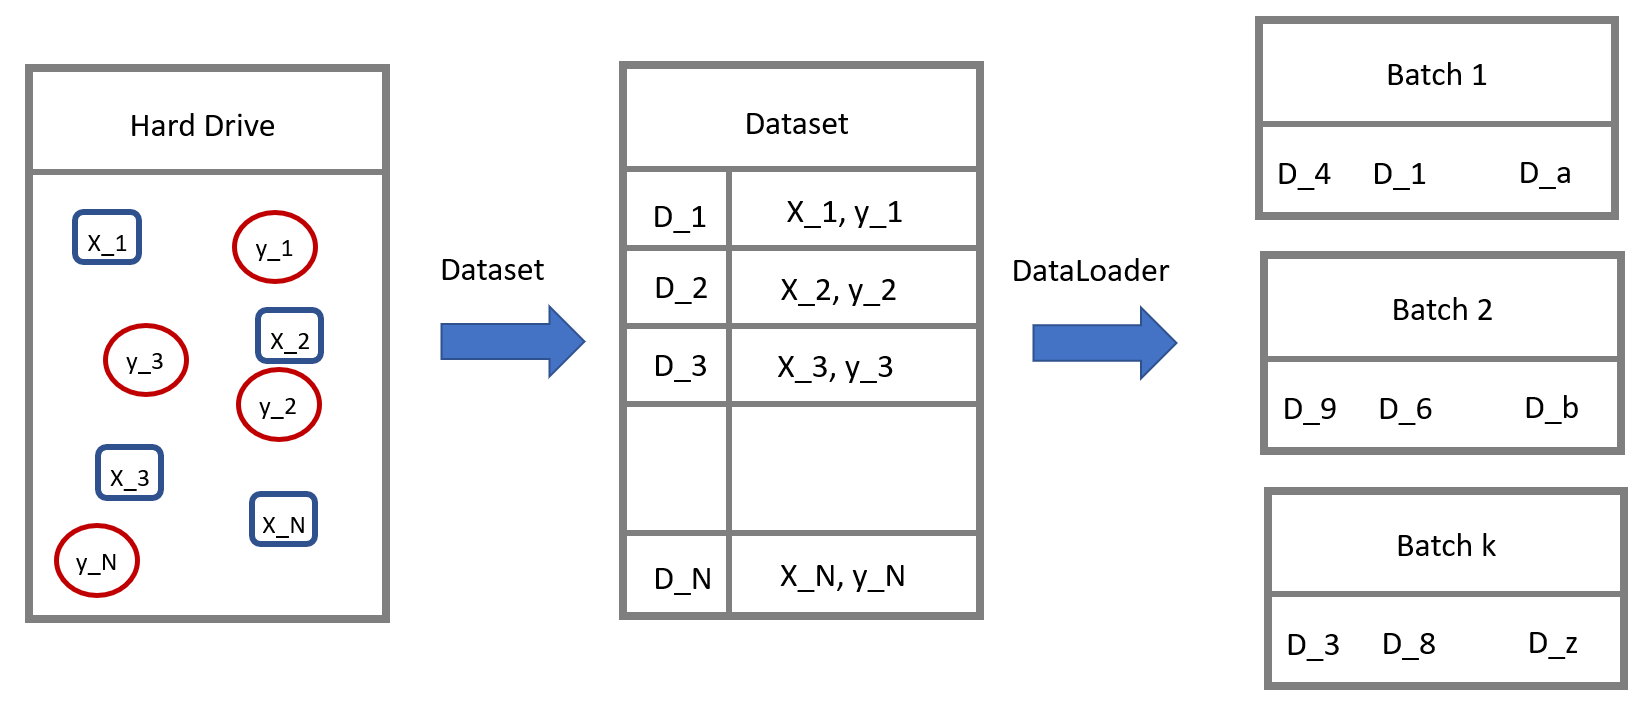

`torch.utils.data.Dataset` is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

*   `__len__` so that len(dataset) returns the size of the dataset.

*   `__getitem__` to support the indexing such that `dataset[i]` can be used to get $i$th sample.

With pytorch dataloaders we can easily load, batch, distribute a pytorch dataset. Read more about pytorch dataloaders [here](https://pytorch.org/docs/stable/data.html)

We have download MNIST Dataset with the code above. Your task is to read the images and the corresponding labels and write your own data loader with data augmentation.

Note: we have two version of the MNIST dataset: version 1: The images are in a csv file with both the label and the image data in the columns of the csv file (the csv file is headerless). version 2: The images are png files with the label in the name of the image, e.g. an image of digit 9, where the file name if 2309 will be saved as 2309-num9.png.

In [ ]:
!ls test/